In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv

2024-05-24 14:34:14.905200: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-24 14:34:14.966578: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-24 14:34:15.389597: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-05-24 14:34:15.389644: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

In [2]:
def visualize_weights(saved_model_path):
    # Load the saved model
    model = tf.keras.models.load_model(saved_model_path, compile=False)
    model.model.summary()
    # Iterate through each hidden layer
    for i, layer in enumerate(model.model.layers):
        if isinstance(layer, tf.keras.layers.Dense):
            # Extract weights of the current hidden layer
            hidden_layer_weights = layer.get_weights()[0]

            # Visualize weights as heatmap
            plt.figure(figsize=(10, 8))
            sns.heatmap(hidden_layer_weights, cmap='viridis', annot=False)
            plt.title(f'Weights of Hidden Layer {i}')
            plt.xlabel('Neurons in Hidden Layer')
            plt.ylabel('Neurons in Previous Layer')
            plt.show()

In [3]:
def visualize_model_params(saved_model_path):
    # Load the saved model
    model = tf.keras.models.load_model(saved_model_path, compile=False)

    # Iterate through each layer
    # for i, layer in enumerate(model.layers):
    for i, layer in enumerate(model.model.layers):
        # if isinstance(layer, tf.keras.layers.Dense):
        layer_name = layer.name
        if i > 0:
            # Extract weights and biases of the current layer
            weights, biases = layer.get_weights()

            # Visualize weights as heatmap
            plt.figure(figsize=(20, 22))
            plt.subplot(2, 1, 1)
            sns.heatmap(weights, cmap='viridis', linewidths=0.5, linecolor='white', annot=False)
            
            if layer_name[:3] == 'ld0':
                plt.title(f'Weights: Input ---> Hidden layer 1')
            elif layer_name[:2] == 'ld':
                plt.title(f'Weights: Hidden layer {layer_name[2]} ---> Hidden layer {int(layer_name[2])+1}')
            else:
                plt.title(f'Weights: Hidden layer 3 ---> {layer_name}')
                

            plt.xlabel('Neurons in Current Layer')
            plt.ylabel('Neurons in Previous Layer')

            # # Visualize biases as bar plot
            # plt.subplot(2, 1, 2)
            # plt.bar(np.arange(len(biases)), biases)
            # plt.title(f'Biases of Layer {i}')
            # plt.xlabel('Neurons')
            # plt.ylabel('Bias Value')
            # plt.tight_layout()
            plt.show()

            # Plot histogram of weights
            plt.figure(figsize=(10, 5))
            plt.subplot(2, 1, 2)
            plt.hist(weights.flatten(), bins=50, color='blue', alpha=0.7)
            plt.title(f'Weight Distribution: {layer_name}')
            plt.xlabel('Weight Value')
            plt.ylabel('Frequency')
            plt.grid(True)
            plt.show()

2024-05-24 14:34:37.567474: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-24 14:34:37.596050: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-24 14:34:37.596199: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-24 14:34:37.597403: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-24 14:34:37.597506: I tensorflow/compiler/xla/stream_executo

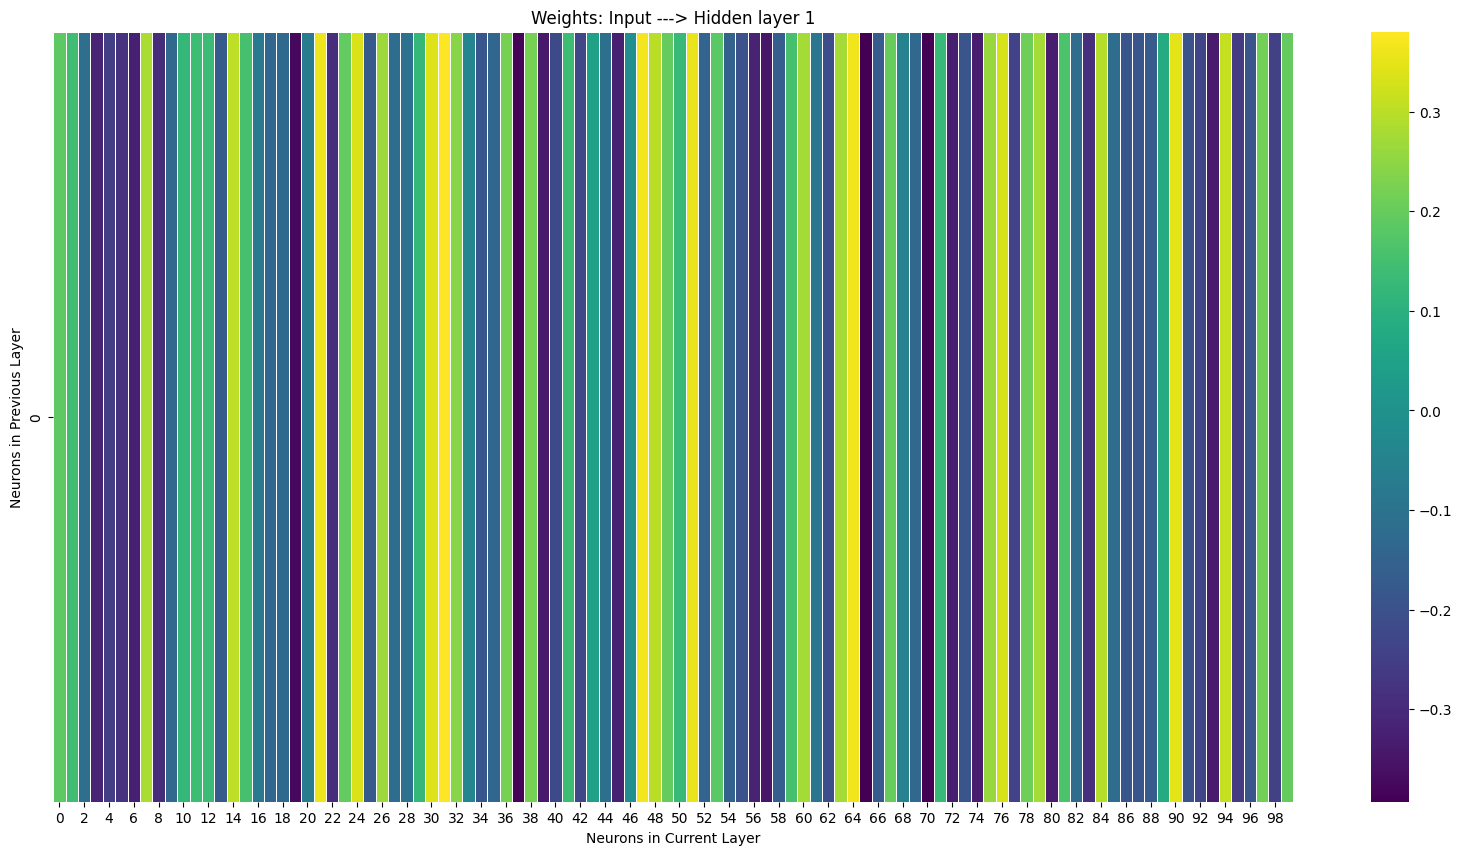

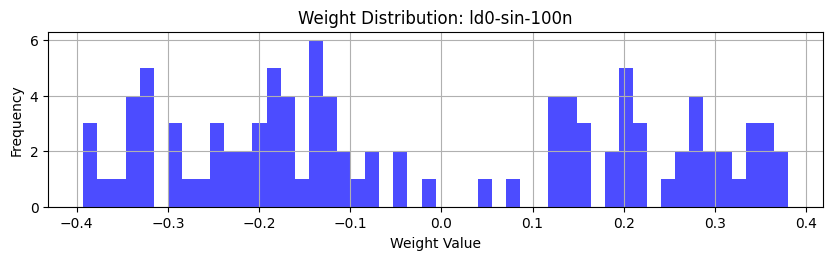

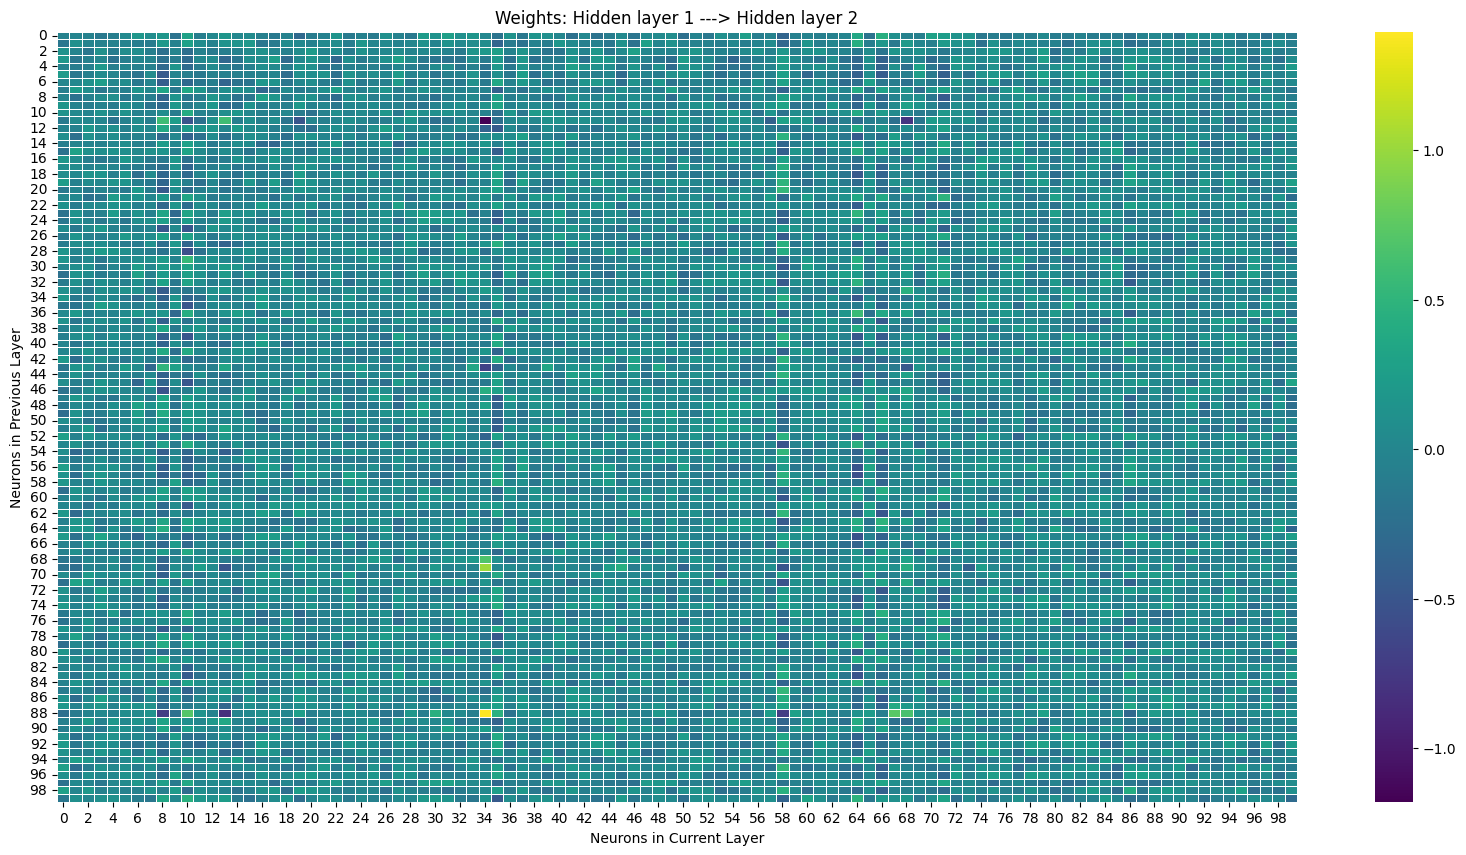

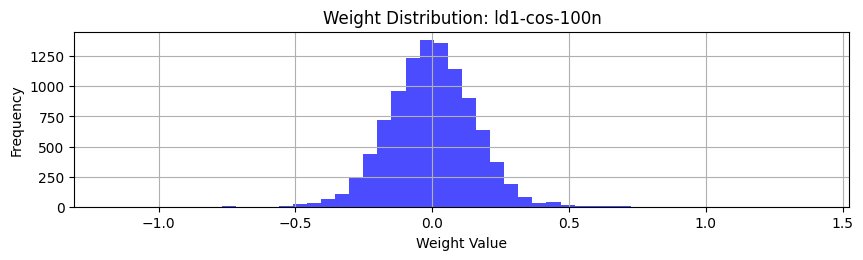

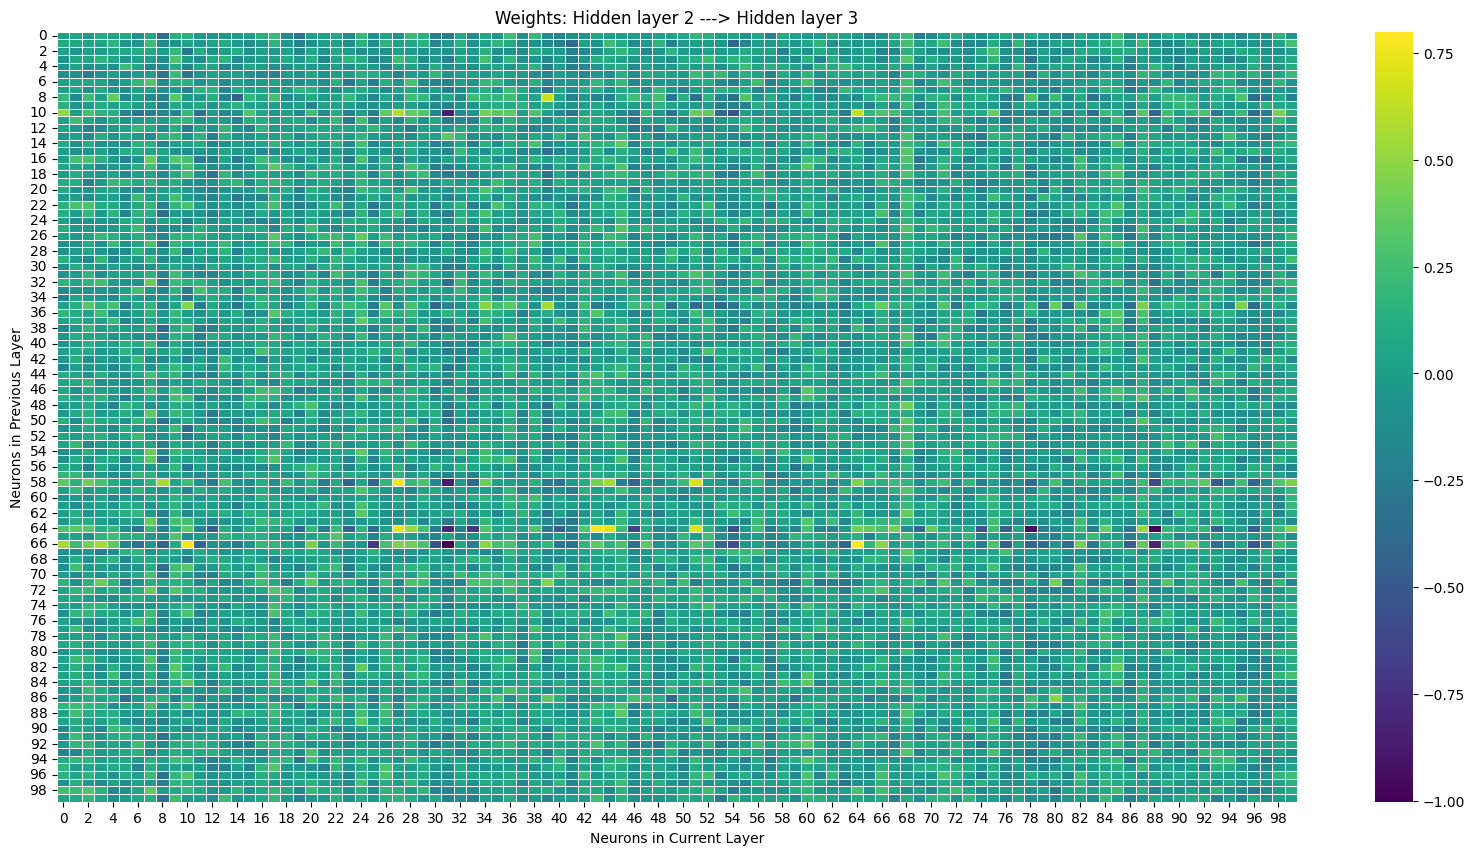

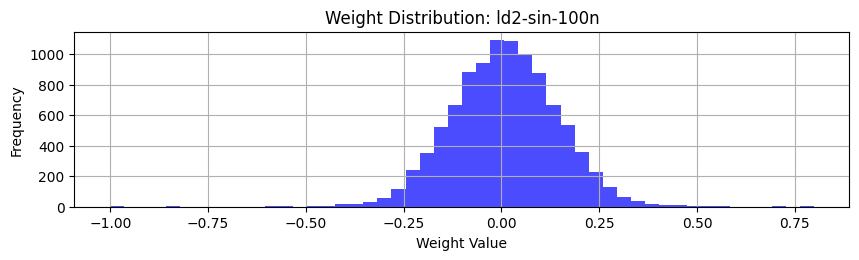

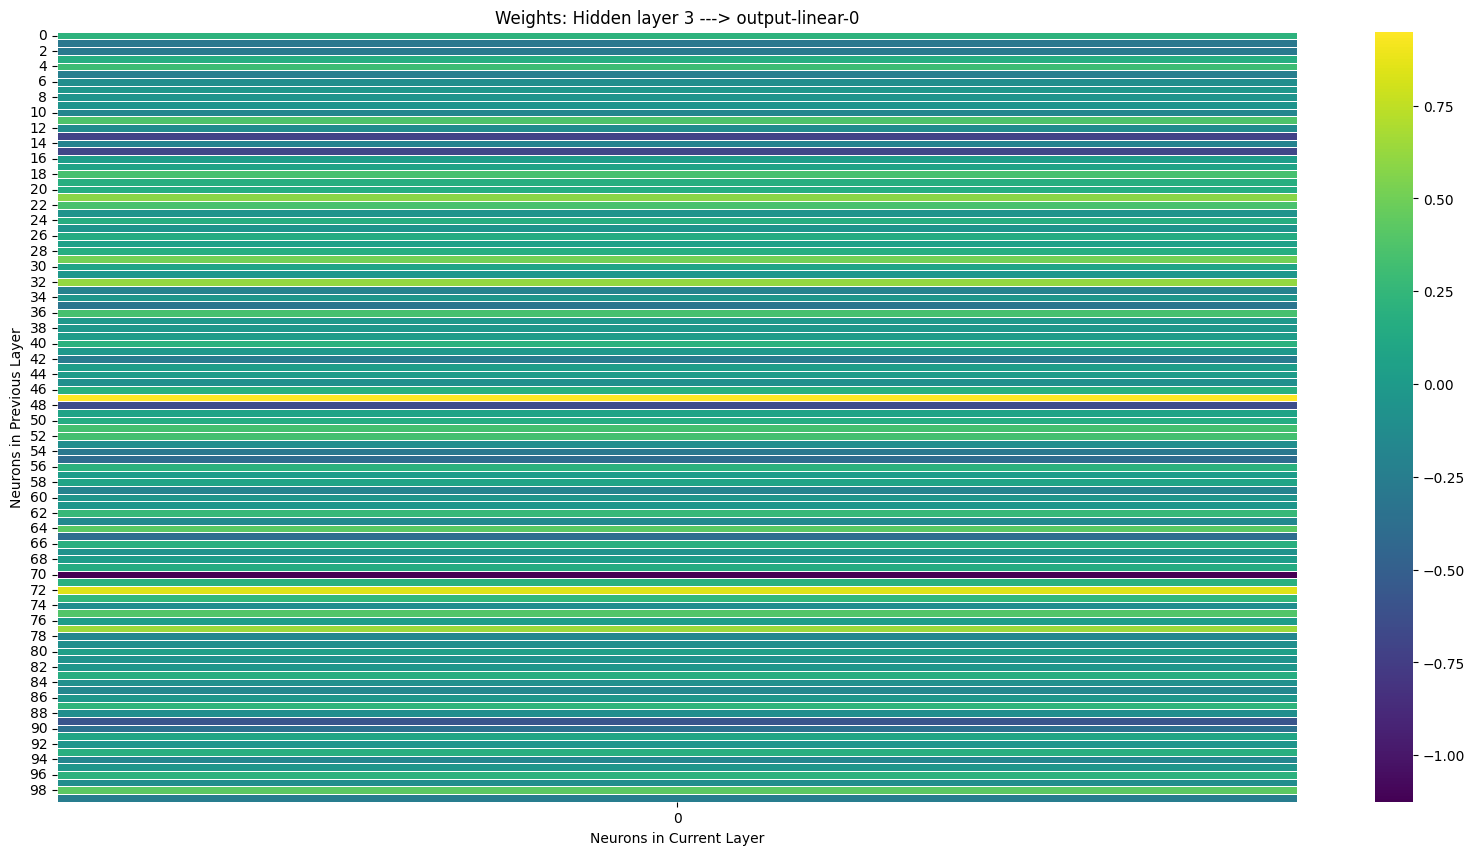

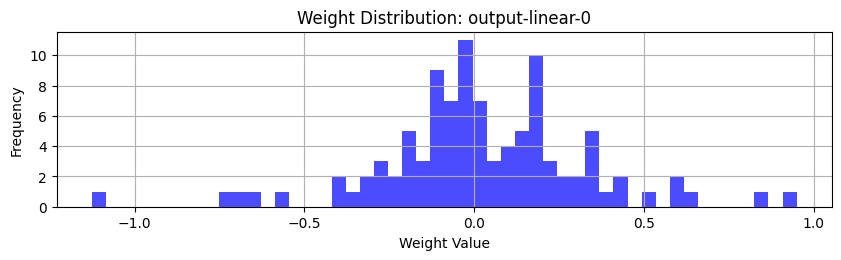

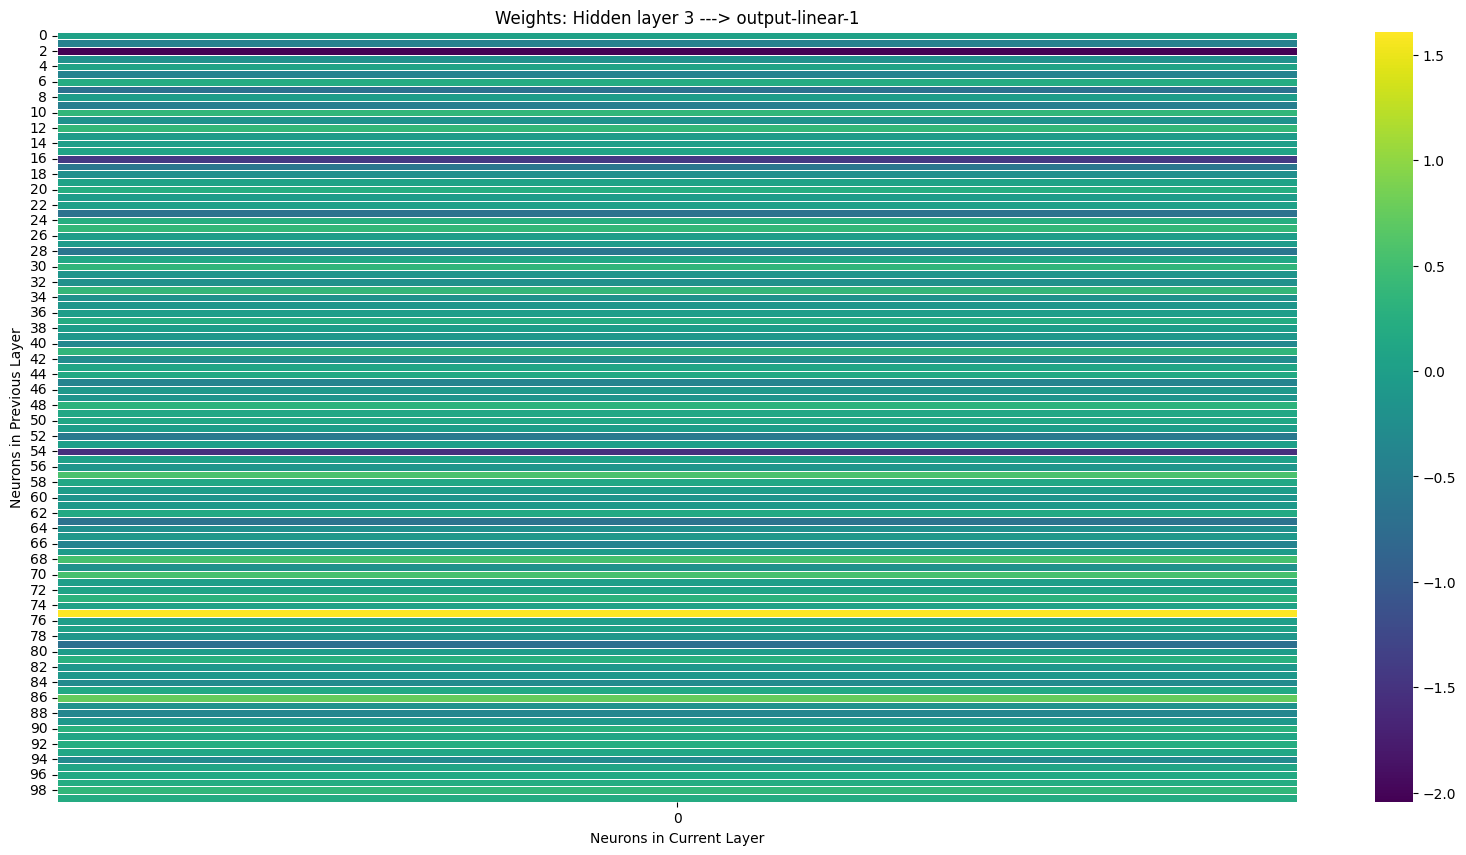

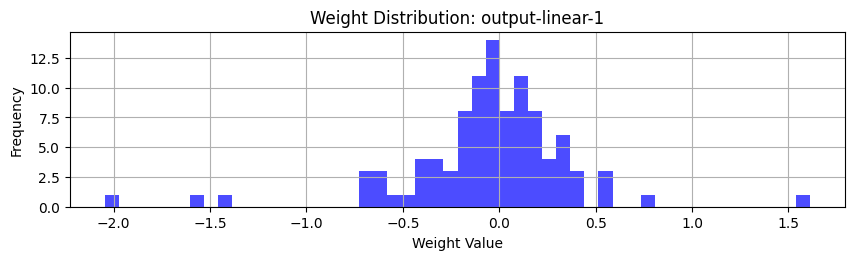

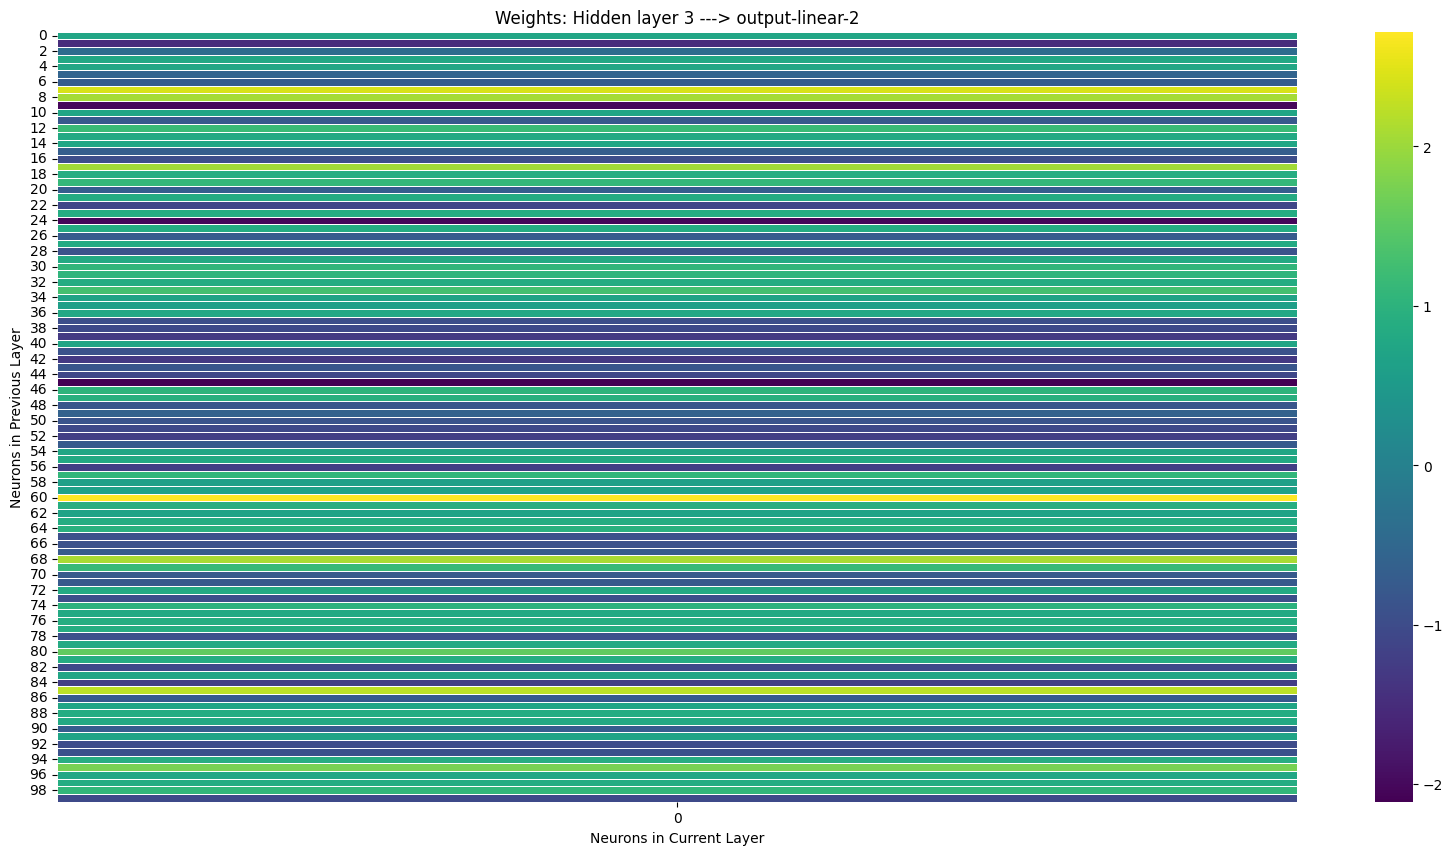

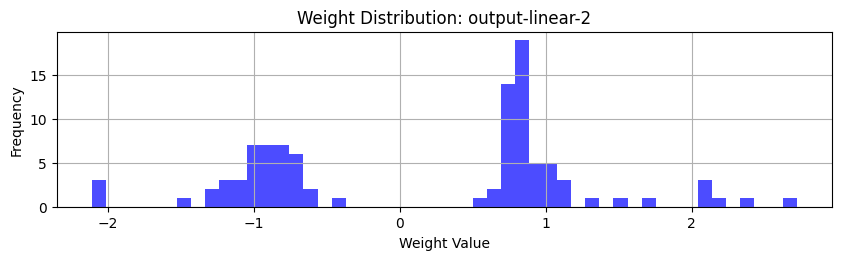

In [4]:
# Example usage
# saved_model_path = 'weights/multi_1700_1800_1900_2000Hz-last'
# saved_model_path = 'weights/extras/VW01_1000Hz-last'
# saved_model_path = 'weights/extras/VW_OP2_01-last'
saved_model_path = 'weights/extras/VW03_OP3-last'
# saved_model_path = 'weights/extras/VW_OP3_02-last'
# saved_model_path = 'weights/extras/VW01_500Hz-last'
# visualize_weights(saved_model_path)

visualize_model_params(saved_model_path)


In [5]:
# exp_name = "VW01_2000Hz"
# exp_name = "VW01_1500Hz"
# exp_name = "pretrained_VW01_500Hz"
exp_name = "VW03_OP3"
saved_model_path = f'weights/extras/{exp_name}-last'
model = tf.keras.models.load_model(saved_model_path, compile=False)
model.summary()
# Iterate through each layer
# for i, layer in enumerate(model.model.layers):
for i, layer in enumerate(model.model.layers):
    # print(layer)
    print(layer.name)
    if i > 0:
        weights, biases = layer.get_weights()
        
        if i == 3:
            print("----" * 4)
            # print(weights)
            print(weights.shape)
            
            print("----" * 4)
            # print(biases)
            print(biases.shape)

            # Define file names for weights and biases
            # weights_file = f"layer_{i}_weights.csv"
            # biases_file = f"layer_{i}_biases.csv"
            params_file = f"{exp_name}_layer_{i}_params.csv"
            flattened_weights = np.ravel(weights)
            flattened_biases = np.ravel(biases)

            # Write weights to CSV
            # with open(weights_file, mode='w', newline='') as file:
            #     writer = csv.writer(file)
            #     writer.writerow(["VW"])  # Header
            #     for item in flattened_weights:
            #         writer.writerow([item])
                # writer.writerows(weights)

            # Write biases to CSV
            # with open(biases_file, mode='w', newline='') as file:
            #     writer = csv.writer(file)
            #     writer.writerow(["VB"])
            #     for item in flattened_biases:
            #         writer.writerow([item])
                # writer.writerow(biases)
            
            # Write all params of a layer into a single array
            with open(params_file, mode='w', newline='') as file:
                writer = csv.writer(file)
                writer.writerow(["Params"])  # Header
                for item in flattened_weights:
                    writer.writerow([item])
                for item in flattened_biases:
                    writer.writerow([item])
            

            print("Params saved to", params_file)
            # print("Weights saved to", weights_file)
            # print("Biases saved to", biases_file)
        

Model: "multi_output_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          [(None, 1),               20703     
                              (None, 1),                         
                              (None, 1)]                         
                                                                 
Total params: 20,703
Trainable params: 20,703
Non-trainable params: 0
_________________________________________________________________
input
ld0-sin-100n
ld1-cos-100n
ld2-sin-100n
----------------
(100, 100)
----------------
(100,)
Params saved to VW03_OP3_layer_3_params.csv
output-linear-0
output-linear-1
output-linear-2
